# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">EXPLORANDO O VAREJO</p>

O arquivo que leremos contém os dados básicos sobre vendas. A empresa possui agências de vendas / revendedores e filiais, e o arquivo de dados contém apenas as informações da filial/revendedor no campo do cliente.

**Estrutura do Projeto:**

[1. **Entendimento do Problema:**](#1)
   
[2. **Primeiras Abordagens Técnicas:**](#2)

[3. **Análise Exploratória de Dados (EDA):**](#3)

[4. **Work in progress ....**](#4)

Fonte do Dataset: https://www.kaggle.com/datasets/shedai/retail-data-set

---

# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">ENTENDIMENTO DO PROBLEMA</p>

# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">PRIMEIRAS ABORDAGENS TÉCNICAS</p>

### PACOTES E CONFIGURAÇÕES

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
from summarytools import dfSummary
from funcoes import analise_descritiva

In [108]:
# Configurar opções de exibição
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [109]:
df = pd.read_csv(
    'dados/retail.csv',
    usecols=[
                'InvoiceID',
                'Date',
                'ProductID',
                'TotalSales',
                'Discount',
                'CustomerID',
                'Quantity'
                ],
    dtype={
        "InvoiceID":np.int16,
        "ProductID":np.int16,
        "CustomerID":np.int16,
        "Quantity": np.int32
    },
    parse_dates=['Date']
    
    )

df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity
0,328,2019-12-27,1684,796.610169,143.389831,185,4
1,329,2019-12-27,524,355.932203,64.067797,185,2
2,330,2019-12-27,192,901.694915,162.305085,230,4
3,330,2019-12-27,218,182.754237,32.895763,230,1
4,330,2019-12-27,247,780.101695,140.418305,230,4


In [110]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,InvoiceID[int16],Mean (sd) : 7221.3 (3443.4)min < med < max:0.0 < 7588.0 < 14078.0IQR (CV) : 4617.0 (2.1),"14,079 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACbElEQVR4nO3dz4raUBiG8e/UUY4KCf5Bd97AQBeCGy+gy15sL6ELF117B+4EEUVngjGmmw4dKB1JYiZvwvPbnzEwDx6j5yMuTVMDVHyp+gKA956qvoCmcM51zayTc/klTdPXR15PXRHkAzjnuqPR6HsQBIM864/H494594MoCfJROkEQDJbL5WsYhlGWhYfDwa9Wq8Fut+uYGUFWfQFNEoZhNJlMXnIs7T78YmqKmxpIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhIIUhI4cS4gCRJ2mYWOOfyLG/UgBhBvlNgcjC43W7tPK95Pp/bcRx/nc1mrVarlWkex6x5A2IE+UeRycE4jn2SJM9RFP00s0wzNZfL5cl735vP59F0Ot1nWdvEATGC/Cv35OBmsxms1+ve9Xpt5X3xfr/PgJgR5D/yTA7u9/tGRVEl7rIhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhSAhhZ8Oa65pR9cIssaaeHSttCB5KkH5mnh0rZQgeSrB58p7dC1JksDEtvuy3iF5KoE41e2+1M+QVTyVoIoxhDpS3e4/DLKqf26BO0c/HA6/hWHYz7qwyBhCnamdVP9vkFXNmBTZSuI49mb2vFgsfo3H42OWtY8YQ0BxH71DVjJjUmQreXtd733MGEI93f0MWdWMSZ6thKg+T1lfyPPFODIr8w6dIJFZmXfoBIncyrhD57QPpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpBAkpNw9XHE4HHzWP3o6nbyZ2fl89tvttsda1r6519NvMvSud4cWBaYAAAAASUVORK5CYII="">",0(0.0%)
2,Date[datetime64[ns]],"Min: 2019-01-02Max: 2023-03-25Duration: 1,543 days",1268 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3cQYriQBiG4b/GtokKERF05wUGZuHSQ8xh5wiz8ATewJ0gEjHdwRgzq4HZTGui+ayk3mdfksWLVP6k4sqyNEDh26svAOEgNsi8vfoC/uWcG5jZe42l57IsP599PXgub2Jzzg2m0+nPOI4nVdcej8eDc+4XwfnNm9jM7D2O48lqtfocj8fZvYuSJInW6/Vkv9+/mxmxecyn2MzMbDweZ7PZ7KPiskEjF4OnaiS2mnuv+Hq99pu4Hvjh6bHV3XvleR4VRfE9y7LfZlb1nw0t0MQ/W62913a7nWw2m+Hlcuk1cE3wQGN7tqp7r8PhwL6r4xjqQubLf7a2bPSLouibWeycq7qUYbDQf2Nry0Y/TdN+nuc/FotFr9fr3b1HNGMYrPbVP1srNvrn8/ktiqLhcrnM5vP54d51DIP1bt4gtGWjPxqNGAZ7jhsEyBAbZIgNMsQGGe/e+lB6YD5n1vEZXRMvsgYb2yPzObNuz+iaepE12NjqzufMgpjRNfIia7Cx/VVzPmcWwIzu2S+yBh9b1/n0fJvYOsy359vE1m1ePd8mNrFXnI315fk2sQmFfjaW2LSCPhtLbC8Q6tlYno1ChtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CDD46qaah6WCfrrmsRWQ93DMqF/XZPYaqh7WCb0r2sS2wOqHpYJ/eua3CBAhtggQ2yQITbIcIPQEl2Y6xFbC3RlrkdsLdCVuR6xtUjb53rcIECG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAaZm+dGkySJqvzg6XSKzMzSNI12u92wa+vadK3qdbda+QNdw7L3AtT0GQAAAABJRU5ErkJggg=="">",0(0.0%)
3,ProductID[int16],Mean (sd) : 870.0 (583.4)min < med < max:0.0 < 660.0 < 1939.0IQR (CV) : 1077.0 (1.5),"1,940 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACh0lEQVR4nO3cz2riUBiG8e+MVVKFBK3YXW+gMAvBjRcwy7nYuYQRXHTdO3AniCh1GozR2VgYhplK/umbk+e3PyWFBz3H5Is7nU4GqPhy6wsA/nR36wv4F+fcvZl1ci7fn06n9zKvB9cjF6Rz7v7h4eF7GIb9POu32+3aOfeDKOtJLkgz64Rh2J9Op+9RFMVZFm42m2A+n/dXq1XHzAiyhhSDNDOzKIri0Wj0K8fS+9IvBlfDoQZSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSCBJSPn1inGErXNt/g2TYCrfw2SdkoWGr2Ww2Wq1WQ+fcNuM1hcfjsZ1xDTxxccgrz7DVbrdrJ0ny9enpqdVqtTLFnCRJkKbpcxzHP80sz5AXaqySqcP9fn8XBEF3PB7Hj4+P6yxrF4tF//X1tXs4HFpVXBvKUdX5otIx2F6vl/nTdb1eM8YqrsrzhexcNqRV9jIHgkRuVbzMgR/GIYUgIYWv7Jrz7W4aQdaYj3fTCLLevHt1IUF6wKdXF3oXZJqmbTMLnXN5lsvtqZrGqyCL3EM309xTNY1XQRa5h666p2oar4L8kOce+pncnqpp+GEcUrz8hMyraQeiAv9vZQ9RE+RZ0w5Eqg9RE+RZ0w5Eqg9RE+RfbnEgKnA/uvBXp9pD1ARZkgL7sWAwGHyLoqiXdaGP80cEWYKi+zEze55MJi/D4TDThKaP80cEWYIy9mNBECRKX523QpAlUtuP1RE/jEMKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQULKxad9NptNkPWPvr29BWZmu90uWC6XXday9sOlnn4DKXqrdVesTwAAAAAASUVORK5CYII="">",0(0.0%)
4,TotalSales[float64],Mean (sd) : 2552.7 (4568.3)min < med < max:0.0 < 1366.1 < 332574.5IQR (CV) : 2067.8 (0.6),"7,013 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwga

#### Aqui estão alguns insights baseados nas informações fornecidas sobre o conjunto de dados:

1. **Valores Ausentes:**
   - Não há

2. **Recursos Numéricos:**
   - Existem seis variáveis numéricas: InvoiceID, ProductID, TotalSales, Discount, CustomerID e Quantity. 
   - Duas delas representam identificações, então não se comportam como números 

3. **Recursos Temporais:**
   - Há uma variável temporal (Date), que representa a data da compra, possibilitando uma futura análise RFV
   - Essa variável tem abrangência de 1543 dias (+ de 4 anos)

4. **Tamanho dos Dados:**
   - O conjunto de dados compreende 29.103 entradas (linhas) e 7 colunas.

# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">EDA</p>

In [111]:
relevant_num_vars = df[['TotalSales','Quantity','Discount']]
analise_descritiva.stats_resume(relevant_num_vars)

,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,TotalSales,2552.679147,1366.101695,779.661017,2847.457627,449.152542,5593.220339,4568.177915,0.000000,332574.460000,332574.460000,28.999487,1897.567762
1,Quantity,5.440367,4.000000,2.000000,4.000000,1.000000,11.000000,6.804520,0.000000,250.000000,250.000000,6.541594,98.130143
2,Discount,451.325294,244.067797,137.288136,508.658644,76.271186,1006.779661,650.348284,-0.004694,14110.169492,14110.174186,5.602114,55.820649


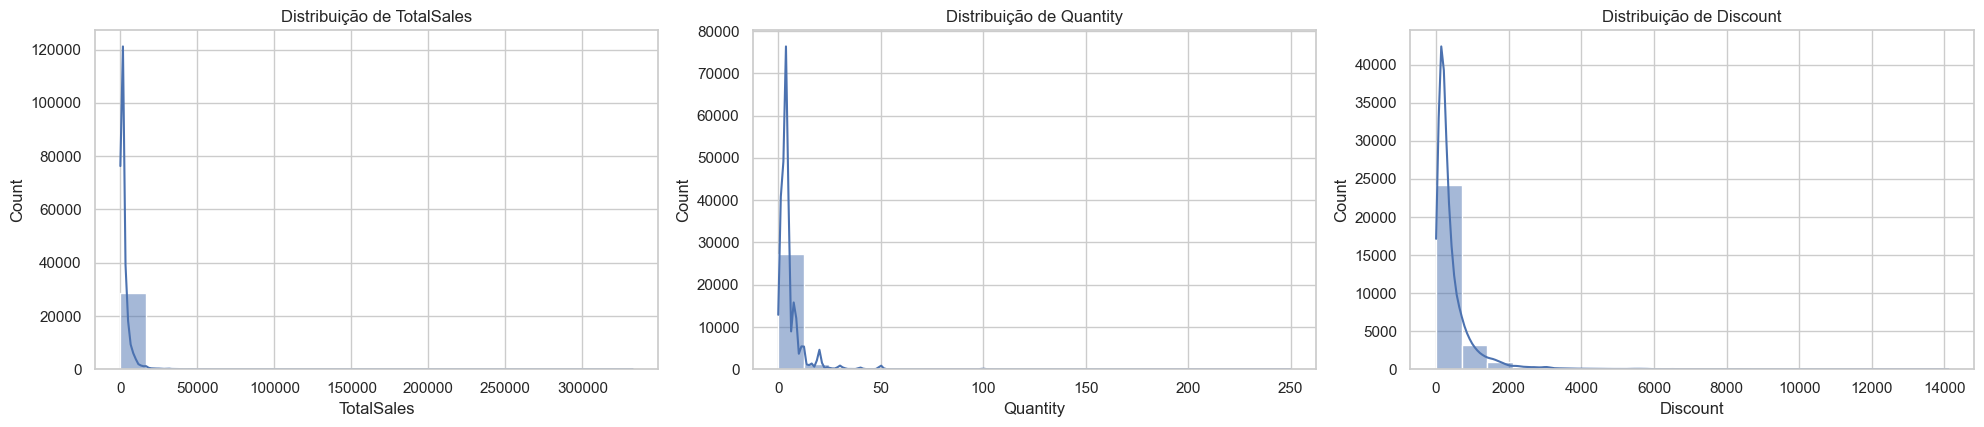

In [112]:
sns.set(style='whitegrid')

plt.figure(figsize=(20,8))

for i, col in enumerate(relevant_num_vars.columns, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(relevant_num_vars[col], bins=20, kde=True)
    plt.title(f'Distribuição de {col}')

plt.tight_layout()

plt.show();


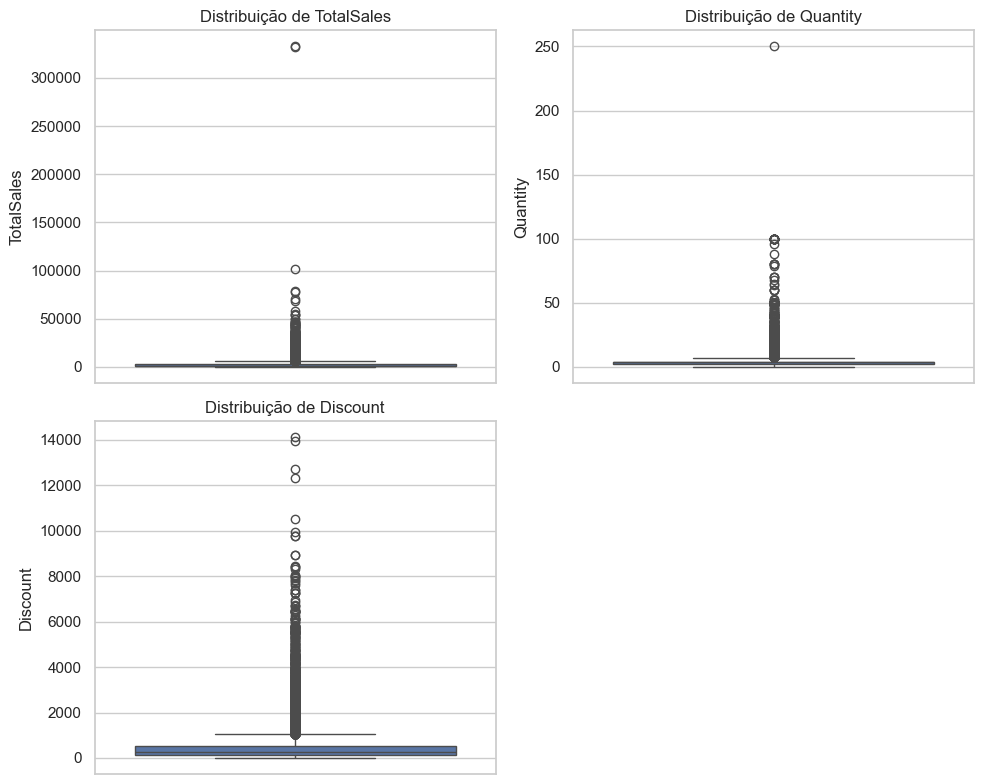

In [113]:
sns.set(style='whitegrid')

plt.figure(figsize=(10,8))

for i, col in enumerate(relevant_num_vars.columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(relevant_num_vars[col])
    plt.title(f'Distribuição de {col}')

plt.tight_layout()

plt.show();


**A quantidade notável de outliers é similar ao que observamos no "mundo real". Isso é bem interessante!**

In [114]:
# Produtos mais vendidos
df.stb.freq(['ProductID'],value="Quantity").head(15)

,ProductID,Quantity,percent,cumulative_Quantity,cumulative_percent
0,192,8158,5.152497,8158,5.152497
1,540,6510,4.111640,14668,9.264137
2,543,6193,3.911426,20861,13.175563
3,1756,5848,3.693528,26709,16.869091
4,1830,4006,2.530143,30715,19.399233
5,885,3525,2.226349,34240,21.625582
6,1347,2742,1.731815,36982,23.357397
7,613,2736,1.728025,39718,25.085422
8,1128,2249,1.420442,41967,26.505864
9,1158,2199,1.388863,44166,27.894727


In [115]:
# Clientes que mais compram
top15_customers = df.stb.freq(['CustomerID'], value="TotalSales").head(15)

top15_customers[['TotalSales', 'cumulative_TotalSales']] = top15_customers[['TotalSales', 'cumulative_TotalSales']].apply(lambda x: x.map('{:,.2f}'.format))

top15_customers

,CustomerID,TotalSales,percent,cumulative_TotalSales,cumulative_percent
0,230,"4,520,184.13",6.084461,"4,520,184.13",6.084461
1,420,"3,203,069.33",4.311539,"7,723,253.46",10.396001
2,57,"3,088,990.83",4.157982,"10,812,244.29",14.553983
3,375,"2,094,873.10",2.819835,"12,907,117.39",17.373818
4,52,"1,633,505.67",2.198805,"14,540,623.06",19.572623
5,301,"1,473,792.39",1.983820,"16,014,415.45",21.556443
6,415,"1,417,296.42",1.907773,"17,431,711.86",23.464216
7,269,"1,347,921.19",1.814389,"18,779,633.06",25.278605
8,15,"1,301,167.61",1.751456,"20,080,800.67",27.030062
9,233,"1,240,798.65",1.670196,"21,321,599.32",28.700257


In [116]:
df['anoMes'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m'))
df['ano'] = df['anoMes'].dt.year
df['mes'] = df['anoMes'].dt.month

In [117]:
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,anoMes,ano,mes
0,328,2019-12-27,1684,796.610169,143.389831,185,4,2019-12-01,2019,12
1,329,2019-12-27,524,355.932203,64.067797,185,2,2019-12-01,2019,12
2,330,2019-12-27,192,901.694915,162.305085,230,4,2019-12-01,2019,12
3,330,2019-12-27,218,182.754237,32.895763,230,1,2019-12-01,2019,12
4,330,2019-12-27,247,780.101695,140.418305,230,4,2019-12-01,2019,12


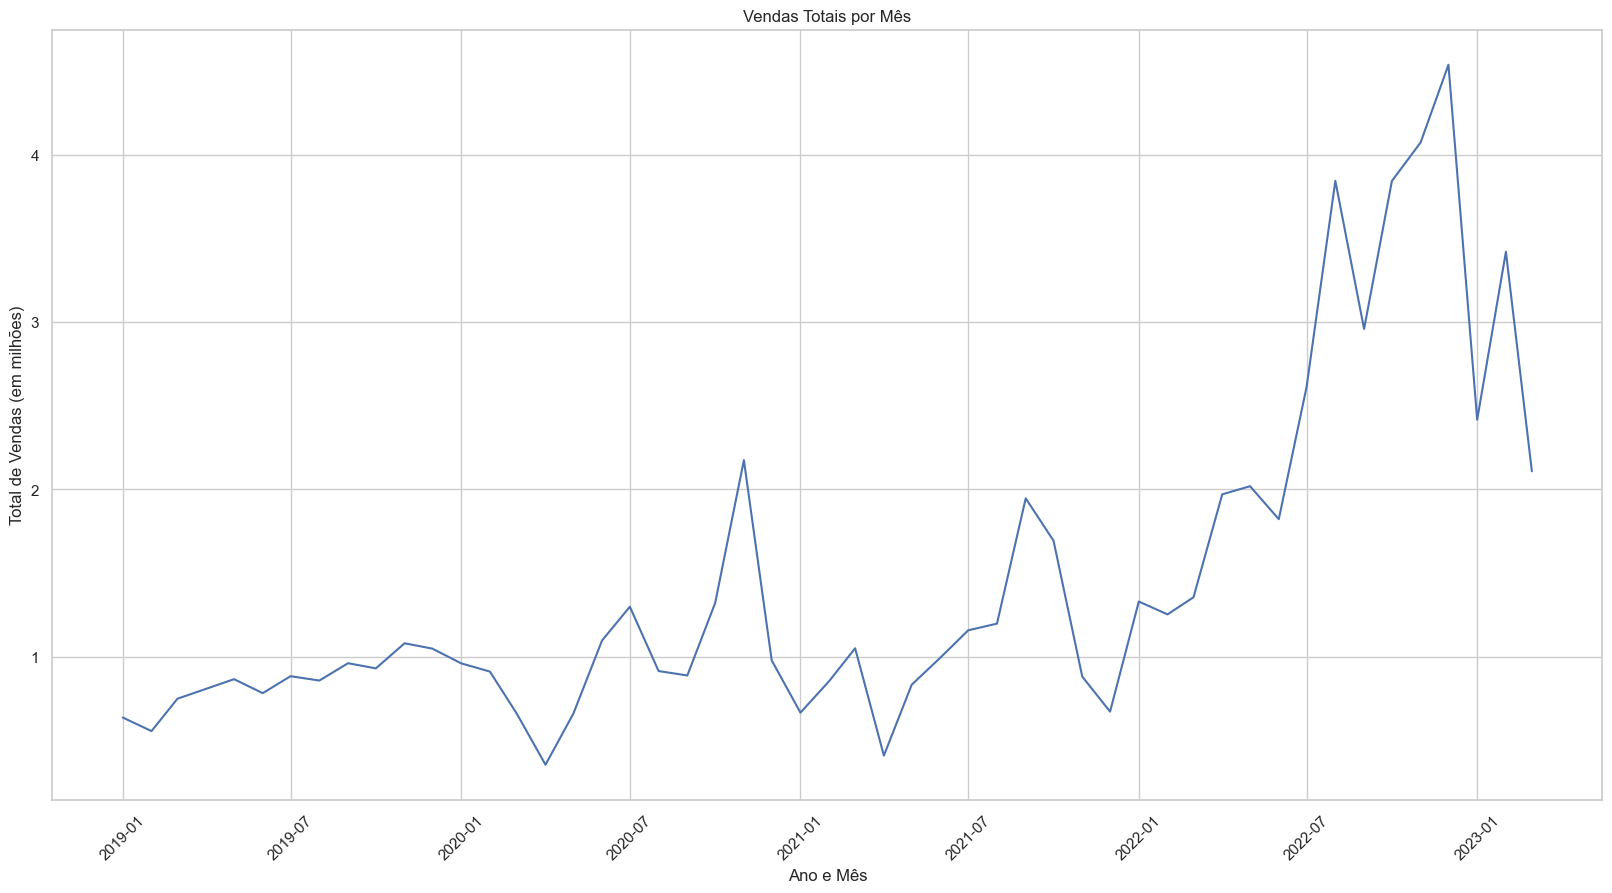

In [118]:
grouped_sales = df.groupby('anoMes')['TotalSales'].sum() / 1000000

plt.figure(figsize=(20, 10))

sns.lineplot(data=grouped_sales)
plt.xticks(rotation=45)  # Rota os labels do eixo X para melhor visualização
plt.xlabel('Ano e Mês')
plt.ylabel('Total de Vendas (em milhões)')
plt.title('Vendas Totais por Mês')
plt.show()


In [119]:
(
    df
    .query("ano == 2022 & mes == 12")
    .groupby('CustomerID')
    ['TotalSales'].sum()
    .sort_values(ascending=False)
).head()

CustomerID
233    418320.245762
57     250565.805082
230    148385.446779
411    131865.254236
458    118918.677966
Name: TotalSales, dtype: float64

In [120]:
(
    df
    .query("ano == 2022 & mes == 12")
    .groupby('ProductID')
    ['TotalSales'].sum()
    .sort_values(ascending=False)
).head()

ProductID
1241    349033.898307
885     315162.711863
1128    249143.220339
941     123181.627118
1347     96959.398305
Name: TotalSales, dtype: float64

In [121]:
df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,anoMes,ano,mes
0,328,2019-12-27,1684,796.610169,143.389831,185,4,2019-12-01,2019,12
1,329,2019-12-27,524,355.932203,64.067797,185,2,2019-12-01,2019,12
2,330,2019-12-27,192,901.694915,162.305085,230,4,2019-12-01,2019,12
3,330,2019-12-27,218,182.754237,32.895763,230,1,2019-12-01,2019,12
4,330,2019-12-27,247,780.101695,140.418305,230,4,2019-12-01,2019,12


In [122]:
(
    df.groupby('ProductID')['Date'].max()

    .reset_index()

    .query('ProductID == 192')
)

,ProductID,Date
192,192,2022-05-31


#### Mais Insights:


1. **Melhor Cliente:**
   - O `Cliente 230` representa 6% das vendas totais. Ele é muito outlier, mas, no mês de maior venda, esse cliente foi "somente" o terceiro colocado.

2. **Produto Favorito:**
   - O produto 192 é o líder de vendas no histórico geral, mas ele deixou de ser comercializado há cerca de 10 meses


3. **Pico de vendas:**
   - Houve um pico muito grande em dezembro de 2022
   - Historicamente a empresa vem crescendo em receita




# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">RFV</p>

In [134]:
df['data_ultima_compra'] = df.groupby('CustomerID')['Date'].transform('max')

df['Recency'] = (df['Date'].max() - df['data_ultima_compra']).dt.days

df.head()

,InvoiceID,Date,ProductID,TotalSales,Discount,CustomerID,Quantity,anoMes,ano,mes,data_ultima_compra,recencia,Recency
0,328,2019-12-27,1684,796.610169,143.389831,185,4,2019-12-01,2019,12,2023-03-25,0,0
1,329,2019-12-27,524,355.932203,64.067797,185,2,2019-12-01,2019,12,2023-03-25,0,0
2,330,2019-12-27,192,901.694915,162.305085,230,4,2019-12-01,2019,12,2023-03-25,0,0
3,330,2019-12-27,218,182.754237,32.895763,230,1,2019-12-01,2019,12,2023-03-25,0,0
4,330,2019-12-27,247,780.101695,140.418305,230,4,2019-12-01,2019,12,2023-03-25,0,0


In [139]:
rfv = (
    df.groupby('CustomerID')
    .agg(
        {
            "Recency":"max",
            "InvoiceID":"nunique",
            "TotalSales":"mean"
        }
    )
    .reset_index()

    .rename(columns={"InvoiceID":"Frequency", "TotalSales":"Monetary"})
)

rfv.drop("CustomerID",axis=1, inplace=True)

rfv

,Recency,Frequency,Monetary
0,7,37,5167.852443
1,735,13,1575.132986
2,52,22,1443.436441
3,625,1,300.847458
4,92,35,1604.676851
5,152,3,1720.338983
6,1230,1,3661.016949
7,214,1,2033.898305
8,494,1,1762.711864
9,859,1,1271.186441


In [137]:
analise_descritiva.stats_resume(rfv[['Recency','Frequency','Monetary']])

,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,491.447732,243.000000,29.000000,933.000000,5.000000,1301.600000,506.797162,0.00,1541.000000,1541.000000,0.668280,-1.052279
1,Frequency,40.471400,4.000000,1.000000,35.000000,1.000000,136.800000,82.664412,1.00,814.000000,813.000000,3.697088,20.385559
2,Monetary,2580.922953,1859.036632,1126.944017,3365.023508,677.966102,5061.942164,2321.173881,233.05,17118.644068,16885.594068,2.723685,10.554600


# <p style="background-color:#1D3C85; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color:#F7DC16; font-size:120%; text-align:center; border-radius:10px; padding:12px;">CLUSTERIZAÇÃO</p>

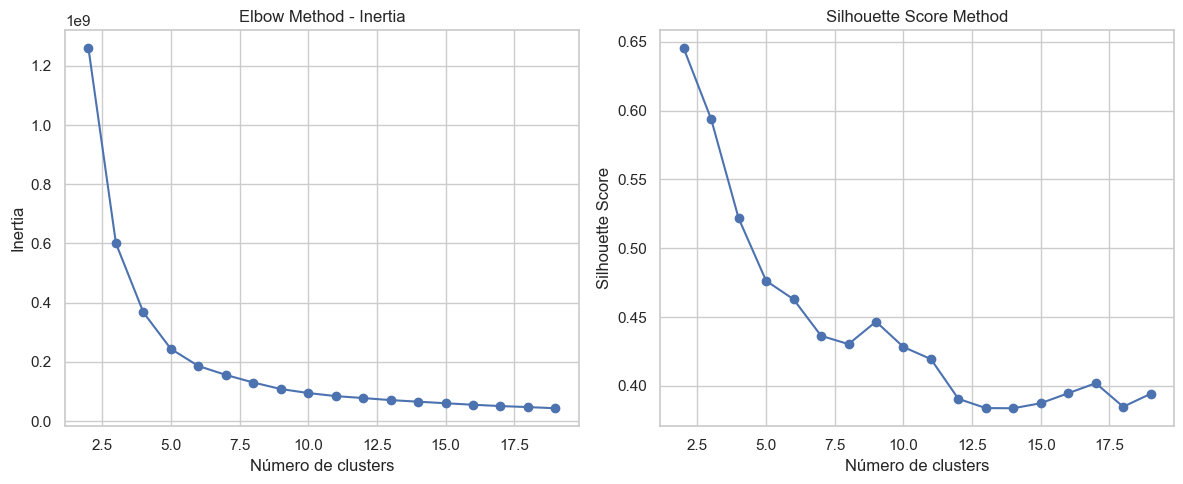

In [140]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = rfv.values

# Tentando diferentes números de clusters
cluster_range = range(2, 20)
inertia_values = []
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit K-Means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=30)
    kmeans.fit(X)
    
    # Calculando inertia
    inertia_values.append(kmeans.inertia_)
    
    # Calculando silhouette score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(12, 5))

# Plotting Inertia
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [141]:
# Escolhendo o número ótimo de clusters
optimal_num_clusters = 5

# Fit K-Means clustering model com o número ótimo de clusters
kmeans_optimal = KMeans(n_clusters=optimal_num_clusters, random_state=42, n_init=30)
rfv['cluster'] = kmeans_optimal.fit_predict(X)

rfv.head()


,Recency,Frequency,Monetary,cluster
0,7,37,5167.852443,2
1,735,13,1575.132986,0
2,52,22,1443.436441,0
3,625,1,300.847458,4
4,92,35,1604.676851,0


In [154]:
sorted(rfv['cluster'].unique())

[0, 1, 2, 3, 4]

In [161]:
for id in sorted(rfv['cluster'].unique()):
    print(f'Cluster {id}')
    display(analise_descritiva.stats_resume(rfv.query(f'cluster == {id}').drop(columns='cluster',axis=1)))
    print("\n")

Cluster 0


,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,232.944751,92.000000,15.000000,287.000000,4.00000,697.000000,323.074435,0.000000,1473.000000,1473.000000,1.867926,3.084888
1,Frequency,63.834254,22.000000,2.000000,88.000000,1.00000,182.000000,102.140706,1.000000,814.000000,813.000000,3.382517,17.315195
2,Monetary,1992.443589,1907.328508,1642.792699,2372.881356,1403.15373,2694.915254,478.596594,1031.163291,2960.442494,1929.279203,0.148768,-0.860526




Cluster 1


,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,161.580645,93.000000,10.000000,257.500000,4.000000,379.000000,163.681196,0.000000,600.000000,600.000000,0.862510,-0.055629
1,Frequency,33.225806,2.000000,1.000000,16.000000,1.000000,132.000000,72.980647,1.000000,360.000000,359.000000,3.352347,12.667630
2,Monetary,6986.092839,6926.093449,5983.050847,7714.144187,5762.711864,8306.347904,1090.943128,5577.121065,9491.525424,3914.404359,0.703492,-0.221970




Cluster 2


,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,176.109091,36.000000,9.250000,176.000000,3.900000,579.100000,306.729177,0.000000,1506.000000,1506.00000,2.621428,6.710535
1,Frequency,55.645455,5.000000,1.000000,77.500000,1.000000,190.300000,92.910669,1.000000,500.000000,499.00000,2.153054,5.138625
2,Monetary,4014.763817,3898.374576,3438.559322,4536.565665,3195.609746,5050.540365,683.424142,3013.771187,5460.563117,2446.79193,0.461638,-0.851099




Cluster 3


,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,279.111111,89.000000,11.000000,253.000000,7.000000,921.800000,368.740934,3.00000,989.000000,986.000000,1.391805,0.347420
1,Frequency,6.000000,1.000000,1.000000,1.000000,1.000000,11.800000,13.114877,1.00000,43.000000,42.000000,2.971671,8.867496
2,Monetary,14004.119542,14618.644068,13262.711864,14929.728814,11187.571109,15966.101695,1898.296572,10853.10978,17118.644068,6265.534288,-0.312257,-0.369200




Cluster 4


,Atributos,Media,Mediana,Q1,Q3,P10,P90,DesvioPadrao,Min,Max,Range,Assimetria,Curtose
0,Recency,1023.340909,1085.000000,805.250000,1318.000000,509.000000,1463.50000,356.110918,61.00,1541.000000,1480.000000,-0.564963,-0.524355
1,Frequency,10.000000,1.000000,1.000000,4.000000,1.000000,23.00000,30.163381,1.00,264.000000,263.000000,5.923875,40.691301
2,Monetary,929.918603,914.820974,659.717312,1170.630212,479.166667,1383.97902,376.329421,233.05,2000.677966,1767.627966,0.489411,-0.014821


C:\Users\DELL\AppData\Local\Temp\ipykernel_3804\112082841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=rfv, palette='pastel')


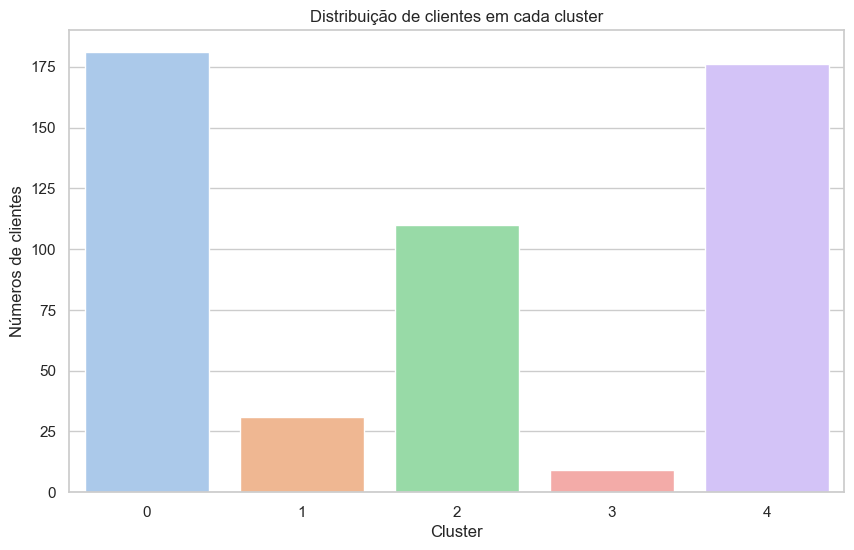

In [143]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=rfv, palette='pastel')
plt.title('Distribuição de clientes em cada cluster')
plt.xlabel('Cluster')
plt.ylabel('Números de clientes')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3804\2202291837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Monetary', data=rfv, palette='viridis')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3804\2202291837.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Recency', data=rfv, palette='viridis')


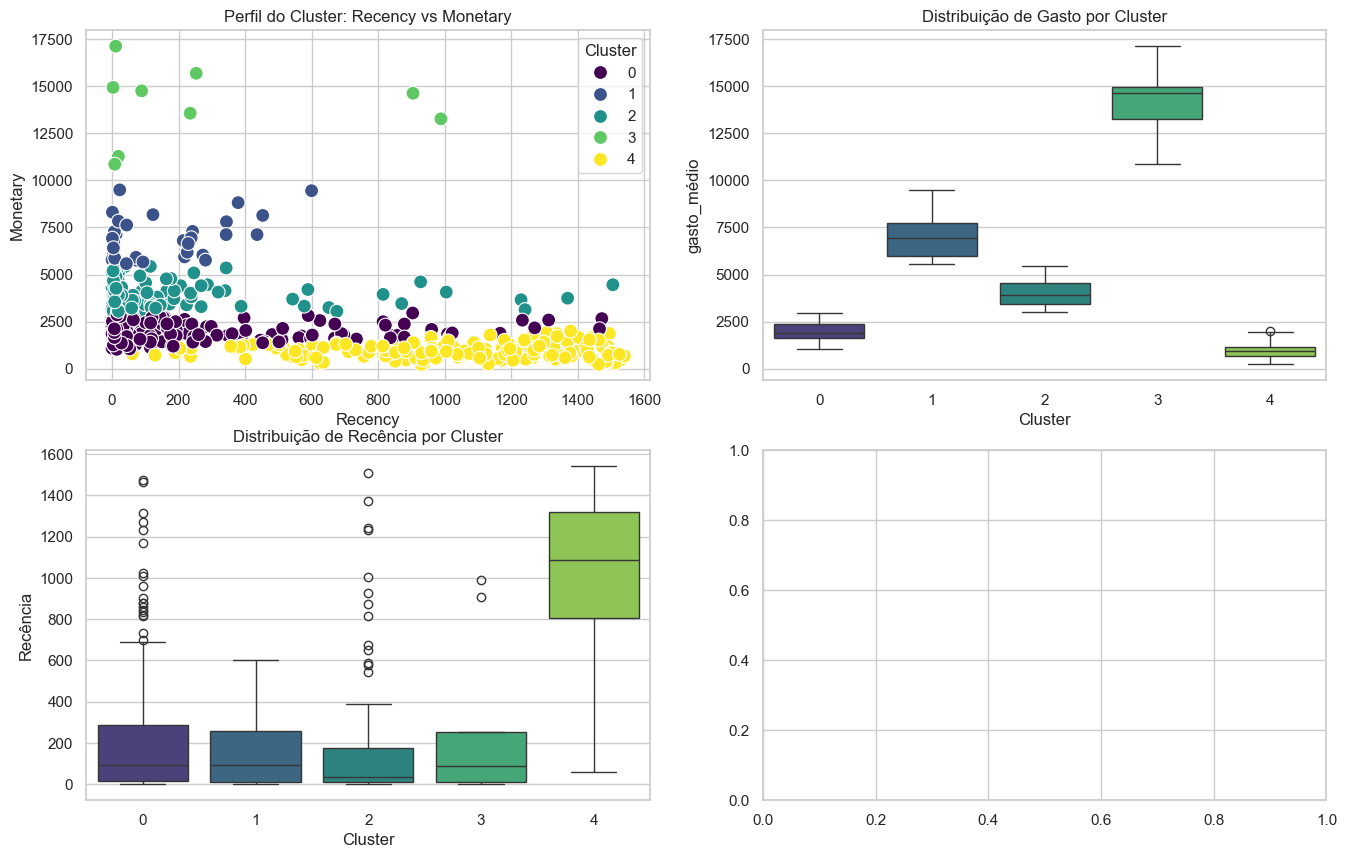

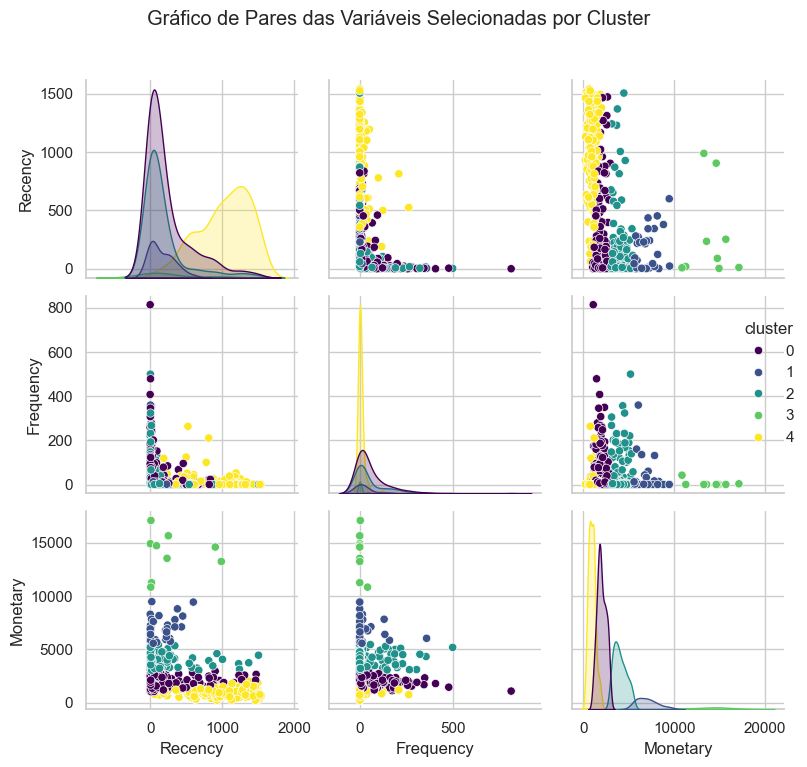

In [159]:
plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
sns.scatterplot(x='Recency', y='Monetary', hue='cluster', data=rfv, palette='viridis', s=100)
plt.title('Perfil do Cluster: Recency vs Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.legend(title='Cluster')

# Box plot para gasto médio
plt.subplot(2, 2, 2)
sns.boxplot(x='cluster', y='Monetary', data=rfv, palette='viridis')
plt.title('Distribuição de Gasto por Cluster')
plt.xlabel('Cluster')
plt.ylabel('gasto_médio')

# Box plot para Recência
plt.subplot(2, 2, 3)
sns.boxplot(x='cluster', y='Recency', data=rfv, palette='viridis')
plt.title('Distribuição de Recência por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recência')

# Pair plot for selected variables
plt.subplot(2, 2, 4)
selected_vars = ['Recency','Frequency','Monetary']
sns.pairplot(rfv, hue='cluster', vars=selected_vars, palette='viridis')
plt.suptitle('Gráfico de Pares das Variáveis Selecionadas por Cluster', y=1.02)

plt.tight_layout()
plt.show()
